# Quantum Gates and Control Pulses


## The Bloch Sphere, revisited

A **qubit** is the fundamental unit of quantum information. Physically, it is a two-level quantum system, conventionally labeled by the orthonormal basis states $|0⟩$ and $|1⟩$. Any pure qubit state $|\psi⟩$ can be written as a complex superposition:

$$
|\psi⟩ = a|0⟩ + b|1⟩ \quad \text{where } a, b \in \mathbb{C}, \quad |a|^2 + |b|^2 = 1
$$

To gain geometric intuition, this state can be reparameterized (up to a global phase) using spherical coordinates:

$$
|\psi⟩ \simeq \cos\left(\frac{\theta}{2}\right)|0⟩ + e^{i\phi} \sin\left(\frac{\theta}{2}\right)|1⟩
$$

Here:
- $\theta$ is the **colatitude** (angle from the z-axis), where $0 \leq \theta \leq \pi$
- $\phi$ is the **longitude** (angle from the x-axis in the x–y plane), where $0 \leq \phi < 2\pi$

This representation maps qubit states to points on the surface of the **unit sphere in 3D space**, known as the **Bloch sphere**.

The corresponding **Bloch vector** is:

$$
\hat{n} = (\sin\theta \cos\phi, \; \sin\theta \sin\phi, \; \cos\theta)
$$

This gives a one-to-one correspondence (modulo global phase) between pure qubit states and points on the Bloch sphere. It provides an intuitive way to visualize quantum gates as rotations of the qubit’s Bloch vector.

> **Note:** The global phase $e^{i\alpha}$ does not affect measurement outcomes and is therefore considered physically unobservable.


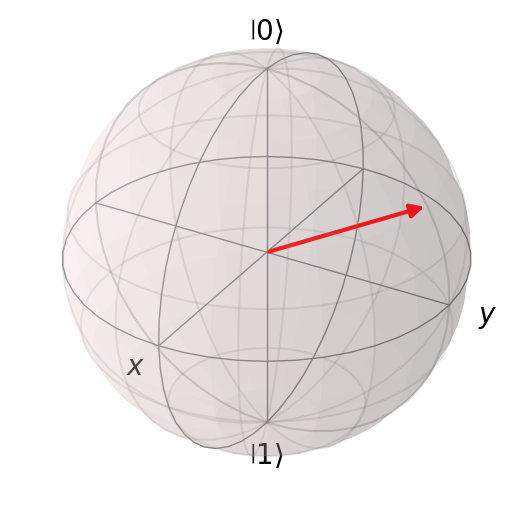

In [6]:
import numpy as np
from qutip import Bloch

# Define Bloch vector from θ and φ
def bloch_vector(theta, phi):
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return [x, y, z]

# Angles in radians
theta = np.pi / 3  # 60 degrees
phi = np.pi / 2    # 90 degrees

# Get the vector
vec = bloch_vector(theta, phi)

# Create Bloch sphere and add vector
b = Bloch()
b.vector_color = ['r']
b.add_vectors(vec)
b.show()  # This handles rendering + GUI interaction


On the Bloch sphere, the state $|0⟩$ is conventionally placed at the **north pole** (top), and $|1⟩$ at the **south pole** (bottom). States located on opposite sides of the sphere are **orthogonal**, and any orthogonal pair defines a valid basis for describing qubit states. Besides the standard Z-basis $\{|0⟩, |1⟩\}$, we commonly refer to other bases aligned with the Cartesian axes:

- **X basis:** $|+⟩ = \frac{1}{\sqrt{2}}(|0⟩ + |1⟩)$ and $|−⟩ = \frac{1}{\sqrt{2}}(|0⟩ − |1⟩)$, corresponding to Bloch vectors $(\pm1, 0, 0)$
- **Y basis:** $|+i⟩ = \frac{1}{\sqrt{2}}(|0⟩ + i|1⟩)$ and $|−i⟩ = \frac{1}{\sqrt{2}}(|0⟩ − i|1⟩)$, corresponding to Bloch vectors $(0, \pm1, 0)$
- **Z basis:** $|0⟩$ and $|1⟩$, corresponding to Bloch vectors $(0, 0, \pm1)$

We refer to these collectively as the **X, Y, and Z bases**. The Z-basis is also known as the **computational basis**, since it is used for labeling qubit states and is the default measurement basis. The X-basis is sometimes called the **Hadamard basis**, because it results from applying a Hadamard gate to


## Standard 1-qubit gates

Classically, there are only two reversible 1-bit logic gates: the **identity** and **NOT** gate (plus two irreversible gates: reset to 0 and reset to 1). In quantum computing, however, the ability to create **superpositions** of $|0⟩$ and $|1⟩$ introduces a much richer variety of gates.

### 3.1 Pauli Gates

The simplest 1-qubit gates are the four **Pauli operators**:
- $I$ (identity)
- $X$ (bit-flip)
- $Y$ (bit-and-phase flip)
- $Z$ (phase-flip)

These are sometimes written as $\sigma_x, \sigma_y, \sigma_z$, or as $\sigma_i$ with indices:
- $\sigma_0 = I$
- $\sigma_1 = X$
- $\sigma_2 = Y$
- $\sigma_3 = Z$

Recall that all Pauli matrices are also **Hermitian**, meaning $\sigma_i^\dagger = \sigma_i$, and each squares to the identity: $\sigma_i^2 = I$.

They also **anti-commute** with one another:
- $XY = -YX = iZ$
- $YZ = -ZY = iX$
- $ZX = -XZ = iY$
- $XYZ = iI$

These relations are foundational in the algebra of quantum operators and form the building blocks of many quantum circuits.

### 🟦 Pauli-I Gate (Identity)

The **Pauli-I gate** is the trivial *no-operation* gate on a single qubit. It is represented by the **identity matrix**:

$$
I = \begin{bmatrix} 1 & 0 \\\\ 0 & 1 \end{bmatrix}
$$

Graphically, it is often drawn as a wire with a labeled box:

<img src="figures/pauli_i.png" alt="Pauli I" style="width: 200px;"/>


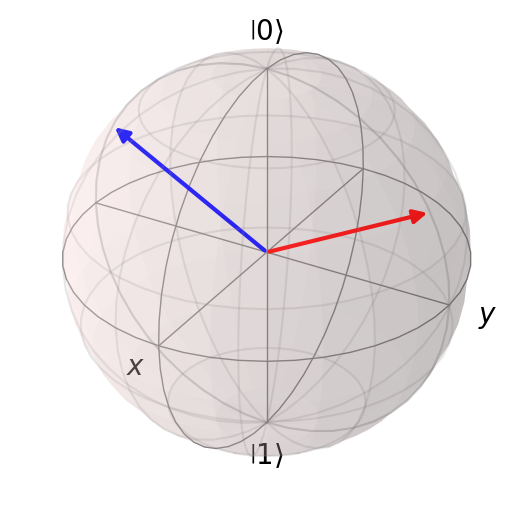

In [38]:
import numpy as np
from qutip import Bloch, basis, sigmax, sigmay, sigmaz

# Initial state: |0⟩
# psi0 = basis(2, 0)
# psi0 = (basis(2, 0) + basis(2, 1)).unit()
# psi0 = (5* basis(2, 0) - 3j * basis(2, 1)).unit()


# Pauli-X gate flips |0⟩ to |1⟩
X = sigmax()
Y = sigmay()
Z = sigmaz()
psi1 = Z * psi0

# Compute Bloch vector from a state
def bloch_coords(psi):
    x = np.real((psi.dag() * sigmax() * psi))
    y = np.real((psi.dag() * sigmay() * psi))
    z = np.real((psi.dag() * sigmaz() * psi))
    return [x, y, z]

# Compute Bloch vectors
vec0 = bloch_coords(psi0)  # Initial: |0⟩ → (0, 0, 1)
vec1 = bloch_coords(psi1)  # After X: |1⟩ → (0, 0, -1)

# Plotting
b = Bloch()
b.vector_color = ['b', 'r']  # Blue = initial, Red = after X
b.add_vectors(vec0)
b.add_vectors(vec1)
b.show()


### 3.2 Rotation Gates

The three **Pauli rotation gates** — $R_x(\theta)$, $R_y(\theta)$, and $R_z(\theta)$ — rotate the qubit state vector by an **arbitrary angle $\theta$** about the **x**, **y**, or **z axis** on the Bloch sphere.

These gates are defined using the **matrix exponential** of the corresponding Pauli operator:

$$
R_A(\theta) = \exp(-i \theta A / 2)
$$

where $A \in \{X, Y, Z\}$ and each Pauli matrix $A$ satisfies $A^2 = I$ (the identity matrix). A useful identity to remember in this context is:

$$
\exp(i\theta A) = \cos(\theta) \, I + i \sin(\theta) \, A
$$

This is a generalization of Euler’s formula:

$$
e^{ix} = \cos x + i \sin x
$$

Using the Taylor expansion of the exponential, and grouping even and odd powers, we get:

$$
\exp(i\theta A) = I + i\theta A - \frac{\theta^2}{2!} I - i \frac{\theta^3}{3!} A + \frac{\theta^4}{4!} I + \cdots
$$

which simplifies to:

$$
= \cos(\theta) I + i \sin(\theta) A
$$

This formula allows us to easily compute rotations using matrix exponentials when working with operators like the Pauli matrices that square to the identity.


### 🔁 $R_x$ Gate — Rotation About the X-Axis

The $R_x(\theta)$ gate performs a rotation of a qubit by an angle $\theta$ **anti-clockwise** about the $\hat{x}$-axis of the Bloch sphere.

It is defined as:

$$
R_x(\theta) = e^{-i \frac{\theta}{2} X}
$$

Using the identity for exponentials of Pauli matrices ($X^2 = I$), we can expand it as:

$$
R_x(\theta) = \cos\left(\frac{\theta}{2}\right) I - i \sin\left(\frac{\theta}{2}\right) X
$$

And in matrix form:

$$
R_x(\theta) =
\begin{bmatrix}
\cos(\frac{\theta}{2}) & -i \sin(\frac{\theta}{2}) \\\\
-i \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})
\end{bmatrix}
$$

We can also define a Hamiltonian that generates this rotation:

$$
H_{R_x} = \frac{1}{2} \theta X
$$

#### ⛓️ Circuit Diagram

The $R_x$ gate is represented in a quantum circuit as:

<img src="figures/rx_theta.png" alt="RX theta" style="width: 200px;"/>

Or

<img src="figures/rx.png" alt="RX" style="width: 200px;"/>


### $R_y$ Gate — Rotation About the Y-Axis

The $R_y(\theta)$ gate rotates a qubit by an angle $\theta$ **anti-clockwise about the y-axis** of the Bloch sphere. It is defined as:

$$
R_y(\theta) = e^{-i \frac{\theta}{2} Y}
$$

Using the identity for exponentials of Pauli matrices:

$$
R_y(\theta) = \cos\left(\frac{\theta}{2}\right) I - i \sin\left(\frac{\theta}{2}\right) Y
$$

Matrix form:

$$
R_y(\theta) =
\begin{bmatrix}
\cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\\\
\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})
\end{bmatrix}
$$

The generator Hamiltonian is:

$$
H_{R_y} = \frac{1}{2} \theta Y
$$


### $R_z$ Gate — Rotation About the Z-Axis

The $R_z(\theta)$ gate rotates a qubit by an angle $\theta$ **anti-clockwise about the z-axis** of the Bloch sphere. It is defined as:

$$
R_z(\theta) = e^{-i \frac{\theta}{2} Z}
$$

Using the same operator identity:

$$
R_z(\theta) = \cos\left(\frac{\theta}{2}\right) I - i \sin\left(\frac{\theta}{2}\right) Z
$$

Matrix form:

$$
R_z(\theta) =
\begin{bmatrix}
e^{-i \frac{\theta}{2}} & 0 \\\\
0 & e^{+i \frac{\theta}{2}}
\end{bmatrix}
$$

This performs a phase shift between the computational basis states.

The generator Hamiltonian is:

$$
H_{R_z} = \frac{1}{2} \theta Z
$$


### Example:  Effect of the $R_z(\theta')$ Gate on a Qubit State

To understand how the $R_z(\theta')$ gate affects a qubit, consider a general qubit state in Bloch sphere coordinates:

$$
|\psi⟩ = \cos\left(\frac{\theta}{2}\right)|0⟩ + e^{i\phi} \sin\left(\frac{\theta}{2}\right)|1⟩
$$

Applying the $R_z(\theta')$ gate gives:

$$
R_z(\theta')|\psi⟩ =
\left( e^{-i \frac{\theta'}{2}} |0⟩⟨0| + e^{+i \frac{\theta'}{2}} |1⟩⟨1| \right)
\left( \cos\left(\frac{\theta}{2}\right)|0⟩ + e^{i\phi} \sin\left(\frac{\theta}{2}\right)|1⟩ \right)
$$

Multiply it out:

$$
= e^{-i \frac{\theta'}{2}} \cos\left(\frac{\theta}{2}\right)|0⟩ + e^{i(\theta' + \phi)} \sin\left(\frac{\theta}{2}\right)|1⟩
$$

Ignoring the **global phase** (which has no observable effect), we write:

$$
\simeq \cos\left(\frac{\theta}{2}\right)|0⟩ + e^{i(\theta' + \phi)} \sin\left(\frac{\theta}{2}\right)|1⟩
$$

---

### 🧭 Interpretation on the Bloch Sphere

- The **elevation angle** θ (polar angle) is **unchanged**.
- The **azimuthal angle** φ (longitude) is **incremented by θ′**.
- This means the $R_z(\theta')$ gate performs a **rotation about the z-axis** on the Bloch sphere.

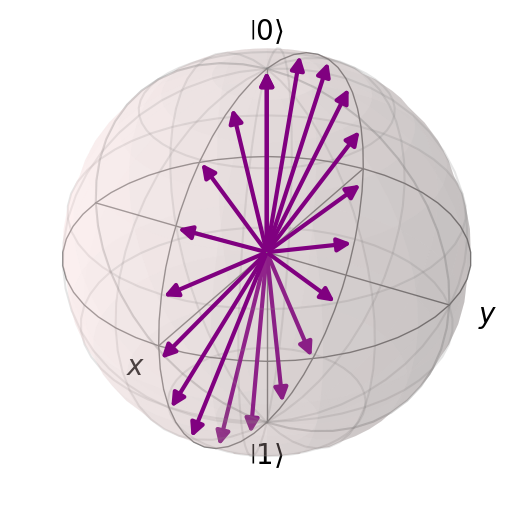

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch, basis, sigmax, sigmay, sigmaz
from qutip_qip.operations import rx, ry, rz

# Initial state: |0⟩
psi0 = basis(2, 0)

# Rotation angles (in radians)
angles = np.linspace(0, 2 * np.pi, 20)

# Function to compute Bloch vector of a state
def bloch_coords(psi):
    x = np.real((psi.dag() * sigmax() * psi))
    y = np.real((psi.dag() * sigmay() * psi))
    z = np.real((psi.dag() * sigmaz() * psi))
    return [x, y, z]

# Store all rotated vectors
vectors = []

for theta in angles:
    psi_rot = ry(theta) * psi0
    vec = bloch_coords(psi_rot)
    vectors.append(vec)

# Plotting all vectors
b = Bloch()
b.vector_color = ['purple'] * len(vectors)
for vec in vectors:
    b.add_vectors(vec)

b.view = [-60, 30]
b.show()


###  Hadamard Gate (H)

The **Hadamard gate** is one of the most important and widely used single-qubit quantum gates. It creates superpositions and plays a central role in many quantum algorithms.

---

###  Matrix Definition

The Hadamard gate is defined as:

$$
H = \frac{1}{\sqrt{2}} 
\begin{bmatrix}
1 & 1 \\\\
1 & -1
\end{bmatrix}
$$

---

### Geometric Action on the Bloch Sphere

The Hadamard gate performs a **$\pi$ rotation** (half-turn) about the axis:

$$
\vec{n} = \frac{1}{\sqrt{2}}(\hat{x} + \hat{z})
$$

This means it is equivalent to:

$$
H \simeq R_{\vec{n}}(\pi)
$$

It lies **midway between the $X$ and $Z$ gates** in terms of its action.

---

### Bloch Sphere Interpretation

On the Bloch sphere:
- It **interchanges the $\hat{x}$ and $\hat{z}$ axes**
- It **inverts the $\hat{y}$ axis**

---

<img src="figures/hadamard_bloch.png" alt="RX theta" style="width: 1200px;"/>

In [ ]:
# Hadamard matrix
H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
H

## 🌀 Phase and T Gates
- **S Gate:** √Z = \[1, 0; 0, i]
- **T Gate:** 4th root of Z = \[1, 0; 0, e^{iπ/4}]

In [ ]:
# S and T gates
S = np.array([[1, 0], [0, 1j]])
T = np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]])
S, T

## 🧠 Exercises
1. Prove that H² = I
2. Apply Rz(π/2) to |+⟩ and visualize the effect
3. Try composing S and H: SHS† — what gate does it resemble?